In [4]:
import astropy.units as u
import astropy.constants as c
from astropy.coordinates import SkyCoord
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
%matplotlib inline
from astropy.io import fits
from itertools import combinations
import pickle
from astropy.cosmology import WMAP9 as cosmo
from final_project import *

In [5]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rc('axes', labelsize=14)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')

# Loading the data we need

## All the data:

In [11]:
data = pd.read_pickle('big_data')
data

,RA,DEC,Region,Stellarity,F115,F150,F200,F277,F356,F410,...,F140_ERROR,F160_ERROR,SPECTRAL_RED_SHIFT,STELLAR_MASS,STELLAR_MASS_ERR,PHOTOM_RED_SHIFT,Object,X,Y,SFR
0,215.024752,52.981212,1,0.821,139492.014814,136481.557209,114663.659470,50708.259260,128218.504232,89432.307145,...,5.243950e+01,33.285878,0.2500,10.319,0.299,0.25,nircam1-3,3033.1875,407.0526,3.827240
1,214.983212,52.952023,2,0.029,12304.995776,21132.884036,33883.504105,50716.320411,57724.468502,54145.566928,...,7.011145e+01,36.586082,1.0530,10.927,0.028,0.98,nircam1-2,7646.4517,419.7906,48.278900
2,214.984985,52.951200,2,0.364,18156.358950,27788.207956,40432.589604,55513.348304,60905.214135,55111.550498,...,7.434307e+01,32.467366,1.1200,11.045,0.026,1.12,nircam1-1,7638.5312,258.1606,2.216390
3,215.034005,52.986189,1,0.029,37419.138223,52888.557422,68284.225064,56398.205674,40657.137985,44950.617224,...,9.681434e+01,26.294318,0.2703,9.475,0.038,0.34,nircam1-4,2144.9175,286.0022,4.595440
4,215.052963,52.997723,1,0.239,41989.647261,55761.184436,57043.162150,75103.933965,344.535744,3510.311943,...,4.056045e+14,252.310901,1.4200,10.233,0.857,1.42,nircam1-5,203.1697,142.7871,73.807900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9201,214.828826,52.798678,2,0.018,149.176427,137.486779,150.358874,241.272051,179.430492,134.343543,...,2.533252e+01,12.743761,4.3100,8.293,0.084,4.31,nircam6-8982,9581.9062,1246.8362,9.478430
9202,214.912746,52.844553,1,0.630,28.854944,30.528963,33.649958,15.605470,12.281535,3.918242,...,1.486475e+01,6.138284,2.5100,7.177,0.148,2.51,nircam6-9253,1446.7140,171.2970,0.726535
9203,214.904154,52.839601,1,0.482,0.005228,0.009379,0.000662,6.055759,8.566630,2.795595,...,1.333602e+01,6.558073,1.0600,6.172,0.013,1.06,nircam6-9247,2302.7722,260.9615,0.030849
9204,214.919315,52.849213,1,0.582,3.367262,7.235462,4.831313,31.423566,62.489169,99.214582,...,4.897944e+01,21.401037,1.0300,8.026,0.169,1.03,nircam6-9154,712.2482,170.8571,5.131350


## A smaple of one pointing (2)

In [14]:
df2 = pd.read_pickle('df2')
df2

,RA,DEC,Region,Stellarity,F115,F150,F200,F277,F356,F410,...,F140_ERROR,F160_ERROR,SPECTRAL_RED_SHIFT,STELLAR_MASS,STELLAR_MASS_ERR,PHOTOM_RED_SHIFT,Object,X,Y,SFR
0,214.960976,52.932000,1,0.001,188.682528,302.025264,195.666162,155.926448,281.731762,0.059924,...,6.479635e+01,2.714110e+01,4.1400,0.000,0.000,4.1400,nircam2-1,520.2705,1733.1802,7.980180
1,214.850041,52.910182,2,0.684,-9.248760,-26.392688,-34.805836,-57.390153,-34.328892,-18.832713,...,-4.442541e+01,-2.595991e+01,6.0018,8.352,0.140,6.0018,nircam2-31,7713.2373,6153.0210,6.879760
2,214.850641,52.910812,2,0.700,8.621534,16.670631,20.642629,40.275024,26.558330,8.663765,...,2.762962e+01,1.987652e+01,1.5800,8.280,0.096,1.5800,nircam2-20,7627.5659,6168.7734,1.689560
3,214.850733,52.910972,2,0.015,266.958468,494.064654,463.141290,603.369995,518.749640,438.881384,...,5.368722e+01,3.406584e+01,1.5800,8.280,0.096,1.5800,nircam2-20,7608.6050,6176.1919,1.689560
4,214.849914,52.910643,2,0.028,28049.476079,41588.845170,53508.568645,23560.603364,21245.940958,42407.217092,...,4.899179e+02,3.660265e+02,0.1100,7.585,0.191,0.1100,nircam2-2,7677.0381,6195.7827,0.316689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8749,214.950729,52.924874,1,0.019,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+12,1.000000e+12,8.3101,9.973,0.101,8.3101,nircam2-8762,1651.9840,1743.3491,25.394400
8750,214.950679,52.924834,1,0.019,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+12,1.000000e+12,8.3101,9.973,0.101,8.3101,nircam2-8762,1657.9917,1743.0000,25.394400
8751,214.959848,52.931333,1,0.001,3.853150,3.098311,-9.239871,129.954271,-3.646456,0.013774,...,1.000000e+12,1.000000e+12,-1.0000,0.000,0.000,-1.0000,nircam2-8761,634.2019,1743.4180,0.000000
8752,214.950833,52.924951,1,0.019,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+12,1.000000e+12,-1.0000,0.000,0.000,-1.0000,nircam2-8763,1640.0358,1743.6152,0.000000


## The Cut Data

In [20]:
cut_data = pd.read_pickle('big_cut_data')
cut_data

,RA,DEC,Region,Stellarity,F115,F150,F200,F277,F356,F410,...,F140_ERROR,F160_ERROR,SPECTRAL_RED_SHIFT,STELLAR_MASS,STELLAR_MASS_ERR,PHOTOM_RED_SHIFT,Object,X,Y,SFR
0,215.024752,52.981212,1,0.821,139492.014814,136481.557209,114663.659470,50708.259260,128218.504232,89432.307145,...,52.439496,3.328588e+01,0.2500,10.319,0.299,0.2500,nircam1-3,3033.1875,407.0526,3.827240
1,214.983212,52.952023,2,0.029,12304.995776,21132.884036,33883.504105,50716.320411,57724.468502,54145.566928,...,70.111446,3.658608e+01,1.0530,10.927,0.028,0.9800,nircam1-2,7646.4517,419.7906,48.278900
2,215.034005,52.986189,1,0.029,37419.138223,52888.557422,68284.225064,56398.205674,40657.137985,44950.617224,...,96.814335,2.629432e+01,0.2703,9.475,0.038,0.3400,nircam1-4,2144.9175,286.0022,4.595440
3,214.940036,52.973504,2,0.915,3486.751272,5420.221424,7596.494780,11720.049401,13797.090490,13719.954188,...,34.186826,2.560313e+01,1.1200,10.253,0.025,1.1200,nircam1-63,7706.6348,4467.1123,34.590100
4,214.948737,52.979825,2,0.415,372.151522,738.973788,1272.797392,2067.913355,2695.096097,3079.245105,...,27.896768,3.566832e+13,2.8400,9.943,0.198,2.8400,nircam1-84,6721.5366,4479.7754,176.771000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33137,214.917728,52.849546,1,0.693,15.992764,15.727966,15.195470,15.243228,15.018155,13.586371,...,12.592587,4.634549e+00,8.1501,8.487,1.245,8.1501,nircam6-9108,756.3657,284.3708,3.805030
33138,214.912216,52.845432,1,0.376,6.091118,6.154537,4.123695,4.743662,6.412815,0.775138,...,8.052594,3.195565e+00,3.2600,7.051,0.117,3.2600,nircam6-9176,1391.2582,268.9023,0.342881
33139,214.905469,52.840647,1,0.432,3.431785,4.028424,3.851416,8.998598,9.090087,12.688858,...,15.654542,7.391690e+00,1.8432,7.287,0.043,1.8432,nircam6-9142,2145.4531,269.6397,0.051668
33140,214.828826,52.798678,2,0.018,149.176427,137.486779,150.358874,241.272051,179.430492,134.343543,...,25.332524,1.274376e+01,4.3100,8.293,0.084,4.3100,nircam6-8982,9581.9062,1246.8362,9.478430


## The EELGs

In [22]:
eelgs = pd.read_pickle('eelgs')
eelgs

,RA,DEC,Region,Stellarity,F115,F150,F200,F277,F356,F410,...,SPECTRAL_RED_SHIFT,STELLAR_MASS,STELLAR_MASS_ERR,PHOTOM_RED_SHIFT,Object,X,Y,SFR,Area,SHAPE
4,214.955712,52.983426,2,0.959,12.111284,6.617296,14.575215,19.126765,50.955854,19.845123,...,7.2401,8.977,0.209,7.2401,nircam1-342,6065.7910,4376.1494,3.136160,Top,p3p44
11,214.940369,52.970817,2,0.143,35.397019,24.001542,30.455694,68.656104,53.023521,29.067086,...,6.4801,8.347,0.143,6.4801,nircam1-641,7936.6235,4239.7817,4.404910,Top,w277
24,214.930437,52.960170,2,0.624,52.093099,43.950960,55.730953,121.401970,59.780602,30.684665,...,4.3500,8.268,0.310,4.3500,nircam1-1233,9374.9424,3958.6521,4.183520,Top,w277
28,214.951152,52.973409,2,0.778,27.697692,27.168353,27.720895,66.323156,42.228875,22.483288,...,4.5500,8.884,0.262,4.5500,nircam1-1478,7194.8125,3847.8994,1.600630,Top,w277
40,214.951936,52.971742,2,0.659,10.303382,38.746461,37.489974,54.789717,65.729269,64.936031,...,9.1601,9.267,0.858,9.1601,nircam1-1850,7310.4062,3675.0889,12.458800,Top,p44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,214.846157,52.809369,2,0.922,47.173621,42.404916,38.862905,41.866656,46.295612,101.248204,...,7.1201,8.328,0.074,7.1201,nircam6-7356,7790.2964,1118.0483,5.525850,Bottom,w410
529,214.847196,52.808349,2,0.969,41.865877,44.323613,36.159395,40.938175,39.514535,121.506241,...,7.0801,8.663,0.128,7.0801,nircam6-7644,7834.8018,981.3619,2.706410,Bottom,w410
537,214.900216,52.844548,1,0.889,17.418578,17.311144,13.874501,36.747642,15.034757,57.897959,...,4.7300,8.015,0.204,4.7300,nircam6-7927,2035.3304,862.9374,0.608112,Bottom,p410sp277
544,214.860355,52.813352,2,0.855,20.764329,24.658043,17.867454,19.673407,22.070584,49.415672,...,7.3301,8.135,0.979,7.3301,nircam6-8393,6759.5356,642.1173,2.794460,Bottom,w410


# Work for Rachel

* load each of the .png files to display the SED plots. Each SED has a guess for the redshift from the code. The most helpful sources will be ones where you think the displayed redshift might be inacurate.

* Move the redshift bar by changing the variable until you get a value you think might work

* We are MOST concerned with sources with a redshift above z=7.

* look for the range of redshifts that this fit is reasonable

* you shouldn't do this for ALL the sources. pick a few that seem like good candidates.

* **We need**: a list of the soruces you choose (the identifier is indicated in the title) and the range of redshifts you think are reasonable for these sources

## How to display the images

* this will opne the paths to the directory of images. These are .png files, not matricies or arrays. You can figure out a way to display them. Or:

In [33]:
#Put in YOUR absolute path
paths = glob.glob('/home/kelcey/computational_phys/Final/pngs/*.png')
#Should distplay the absolute path to one of the images
paths[0]

'/home/kelcey/computational_phys/Final/pngs/nircam3-564.png'

you can just opne them up in anohter window on your computer and click through them. They should be in the pngs folder of this repository.

You can move the redshift bar below by just changing the redshift variable.

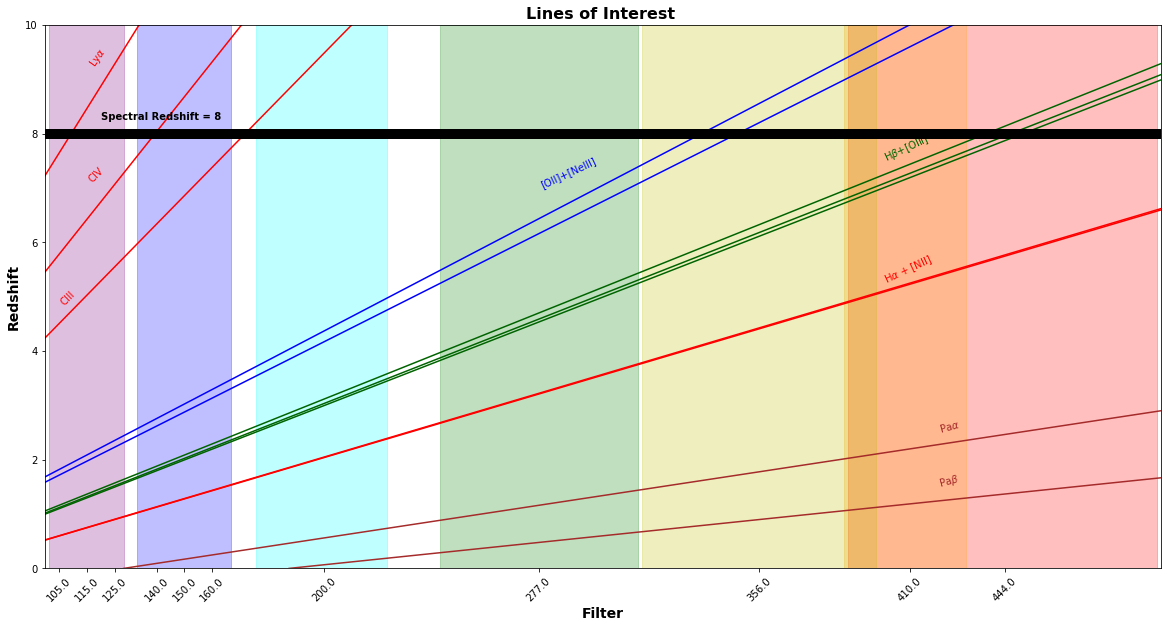

In [18]:
redshift = 8
john_plot(redshift, df2, source = '')